In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('twitterData.csv')
df.head()

,Unnamed: 0,textID,text,selected_text,sentiment
0,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
1,2,088c60f138,my boss is bullying me...,bullying me,negative
2,3,9642c003ef,what interview! leave me alone,leave me alone,negative
3,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
4,6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16363 non-null  int64 
 1   textID         16363 non-null  object
 2   text           16363 non-null  object
 3   selected_text  16363 non-null  object
 4   sentiment      16363 non-null  object
dtypes: int64(1), object(4)
memory usage: 639.3+ KB


Earlier Data set consist of 3 clsses but i remove 1 class which is neutral since I don't have GPU power so it difficult to train 25k data and i also tried to take 1000 sample randomly and the train ml models but getting around 65 to 70 % accuracy

In [253]:
df.drop(columns=['textID','selected_text'],inplace=True)

Lets take sample of 1000 data to build model

In [254]:
df=df.sample(1000,random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_21928\512321802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='sentiment',palette=color)


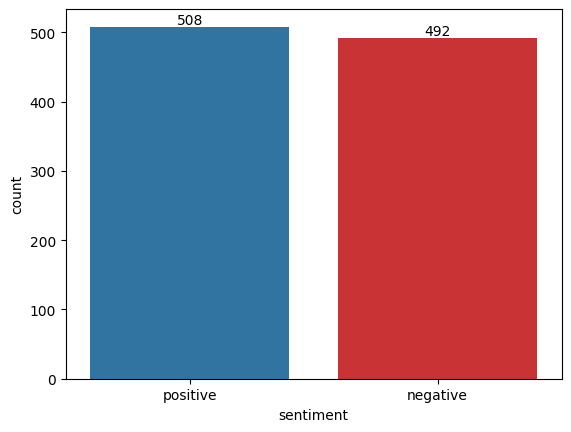

In [255]:
color=['#1f78b4','#e31a1c',]
ax=sns.countplot(data=df,x='sentiment',palette=color)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Text Cleaning

In [256]:
import contractions
import contractions
import nltk
from textblob import TextBlob
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

ps = PorterStemmer()

In [257]:
def remove_httml_tags(text):
    res=re.sub('< .*?>','',text)
    return res
df['text']=df['text'].apply(remove_httml_tags)

In [258]:
df['No_of Char']=df['text'].apply(len)
df['No_of_Words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [259]:
df.head()

,Unnamed: 0,text,sentiment,No_of Char,No_of_Words
8812,14813,thanks will try to behave,positive,26,5
10802,18134,Today is lame because I am not in Orlando I a...,negative,84,17
5397,9074,hahahaha! i laughed my **** off just now. thanks,positive,49,14
13806,23126,Gahh ! This weather sucksss !,negative,29,6
10064,16935,Fallen in love with enter shikari again. Might...,positive,93,20


In [260]:
print("Average number of characters in Positive Sentiment -",df[df['sentiment']=='positive']['No_of Char'].mean())
print("Average number of Words in Positive Sentiment -",df[df['sentiment']=='positive']['No_of_Words'].mean())

Average number of characters in Positive Sentiment - 68.70275590551181
Average number of Words in Positive Sentiment - 15.964566929133857


In [261]:
print("Average number of characters in negative Sentiment -",df[df['sentiment']=='negative']['No_of Char'].mean())
print("Average number of Words in negative Sentiment -",df[df['sentiment']=='negative']['No_of_Words'].mean())

Average number of characters in negative Sentiment - 73.869918699187
Average number of Words in negative Sentiment - 17.684959349593495


In [262]:
def transform(text):
    text=text.lower()
    y=[]
    for i in text.split():
        y.append(contractions.fix(i))
    text=" ".join(y)
    text=nltk.word_tokenize(text)
    y.clear()
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for word in text:
        y.append(str(TextBlob(word).correct()))
    text=y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word  not in string.punctuation:
            y.append(word)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [263]:
df['text']=df['text'].apply(transform)

In [264]:
df.sample()

,Unnamed: 0,text,sentiment,No_of Char,No_of_Words
14843,24828,work day monday tri rememb email smart remind,positive,106,30


In [265]:
def most_frequent_words(sentiment_value,text_column):
    sentiment_df=df[df['sentiment']==sentiment_value]
    all_text=" ".join(sentiment_df[text_column])
    tokens=word_tokenize(all_text)
    freq=FreqDist(tokens)
    most_frequent_words=freq.most_common(10)
    return dict(most_frequent_words)

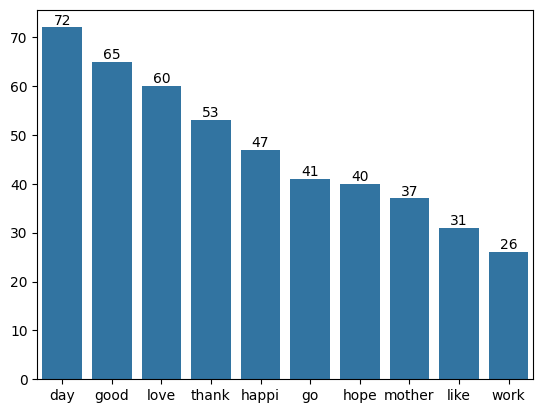

In [266]:
ax=sns.barplot(data=most_frequent_words('positive','text'))
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

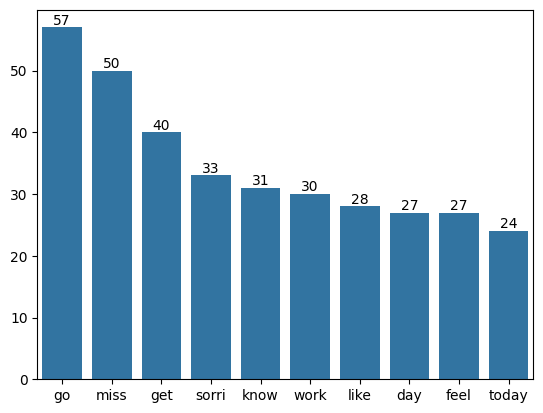

In [267]:
ax=sns.barplot(data=most_frequent_words('negative','text'))
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [268]:
df.head()

,Unnamed: 0,text,sentiment,No_of Char,No_of_Words
8812,14813,thank tri behav,positive,26,5
10802,18134,today lame orlando soon look forward next friday,negative,84,17
5397,9074,ahahah laugh thank,positive,49,14
13806,23126,gash weather success,negative,29,6
10064,16935,fallen love enter shikari might go walk ladi l...,positive,93,20


In [269]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['sentiment']=lb.fit_transform(df['sentiment'])

In [270]:
# 1 -positive
# 0 - negative

<Axes: >

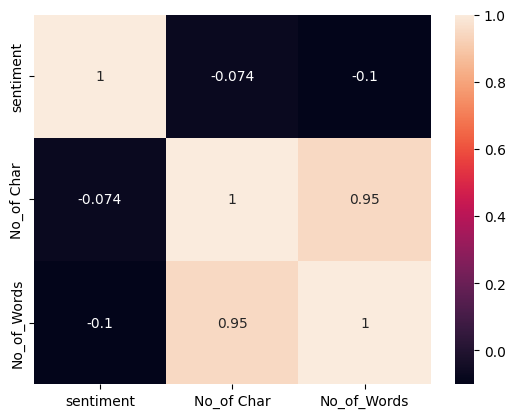

In [271]:
sns.heatmap(df[['sentiment','No_of Char','No_of_Words']].corr(),annot=True)

No of char and no of words had a very week correlation 

In [272]:
df.drop(columns=['No_of Char','No_of_Words'],inplace=True)

For converting text into vector I will count Vectorizer and i also tried Tfidf but it dosen't gave me good result

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['text']).toarray()
y=df['sentiment'].values

In [ ]:
x=np.array(x)
y=np.array(y)

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [200]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,ConfusionMatrixDisplay

We mainly focus on Recall becuase if classify negative as positive which is not a big mistake but if we classify positive as negative which we will be problem so we use Recall because we want to decrease False Negative

Accuracy_Score 0.815
Recall Score 0.8775510204081632


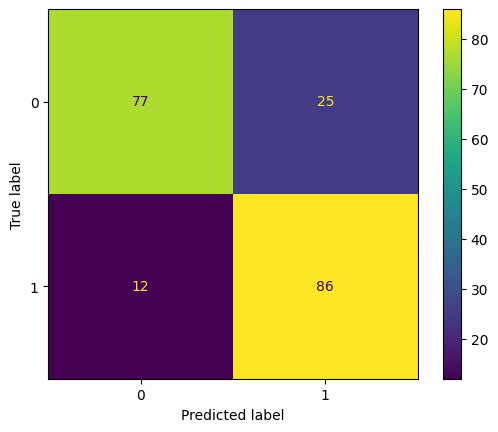

In [201]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print("Accuracy_Score",accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bnb.classes_)
disp.plot()
plt.show()

Accuracy_Score 0.83
Recall Score 0.8571428571428571


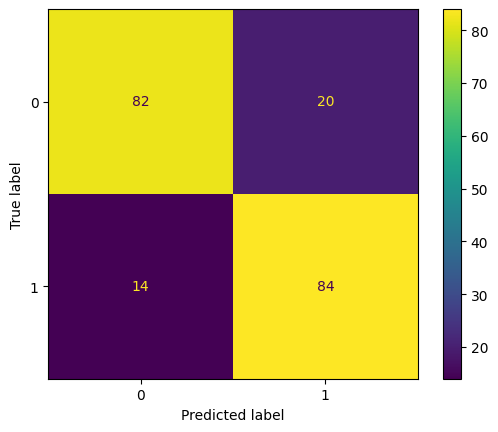

In [202]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced',tol=0.3,max_iter=200,multi_class='multinomial',C=10,solver='lbfgs',)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
pred_p=lr.predict_proba(x_test)[:,1]
print("Accuracy_Score",accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

0.8951


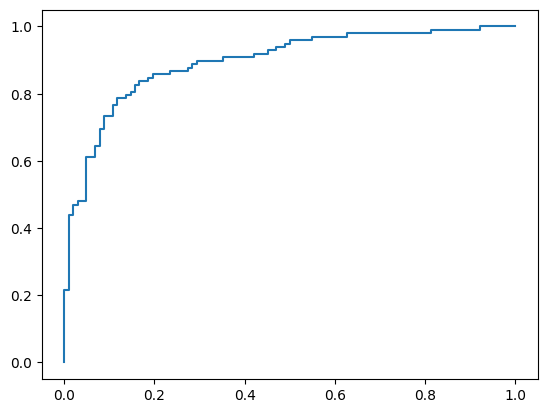

In [203]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thres=roc_curve(y_test,pred_p)
auc=round(roc_auc_score(y_test,pred_p),4)
print(auc)
plt.plot(fpr,tpr)


In [204]:
t=thres[np.argmax(tpr-fpr)]
pred=np.where(pred_p>t,1,0)
recall_score(y_test,pred)

0.826530612244898

Accuracy_score 0.835
Recall Score 0.826530612244898


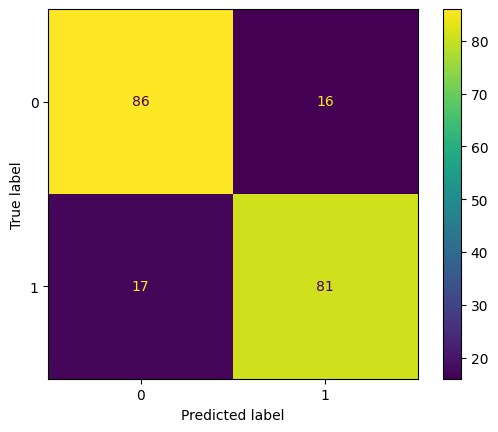

In [205]:
from sklearn.svm import SVC
svc=SVC(C=3.5,kernel='rbf',gamma=0.1,coef0=0.01,tol=0.02,class_weight='balanced',probability=True)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
pred_p=svc.predict_proba(x_test)[:,1]
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

0.8927


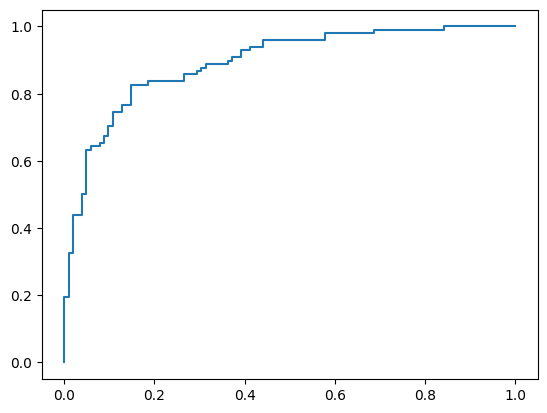

In [206]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thres=roc_curve(y_test,pred_p)
auc=round(roc_auc_score(y_test,pred_p),4)
print(auc)
plt.plot(fpr,tpr)

In [207]:
t=thres[np.argmax(tpr-fpr)]
pred=np.where(pred_p>t,1,0)
recall_score(y_test,pred)

0.8163265306122449

Accuracy_score 0.8
Recall Score 0.7857142857142857


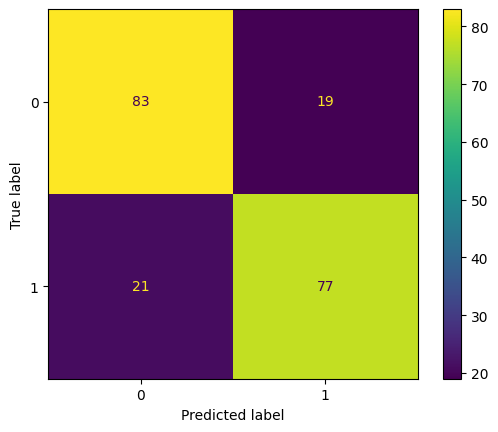

In [208]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 110, splitter= 'best',min_samples_split=5,random_state=42,class_weight='balanced')
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

Accuracy_score 0.79
Recall Score 0.7448979591836735
0.76375


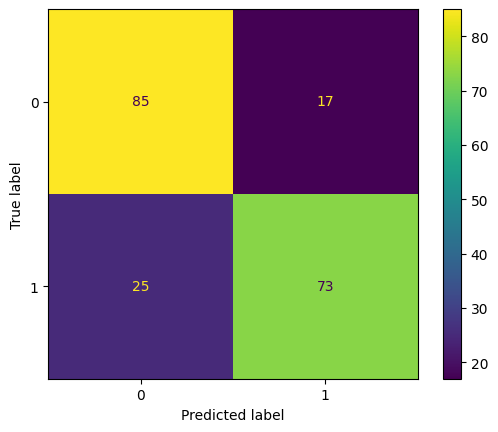

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=140,criterion= 'gini',min_samples_split=4,random_state=42,oob_score=True,n_jobs=-1)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
print(rf.oob_score_)
cm = confusion_matrix(y_test, pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

Accuracy_score 0.825
Recall Score 0.7551020408163265


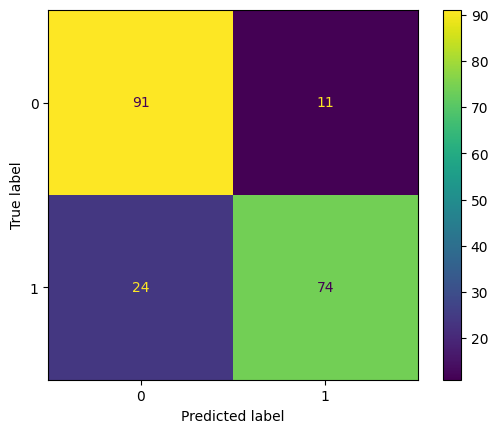

In [210]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=110,learning_rate=0.3)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=adc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adc.classes_)
disp.plot()
plt.show()

Accuracy_score 0.775
Recall Score 0.7448979591836735


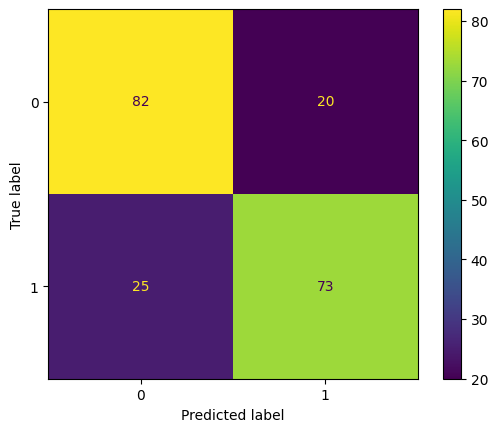

In [211]:
from sklearn.ensemble import ExtraTreesClassifier
etc_c=ExtraTreesClassifier()
etc_c.fit(x_train,y_train)
pred=etc_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=etc_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=etc_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.81
Recall Score 0.7551020408163265


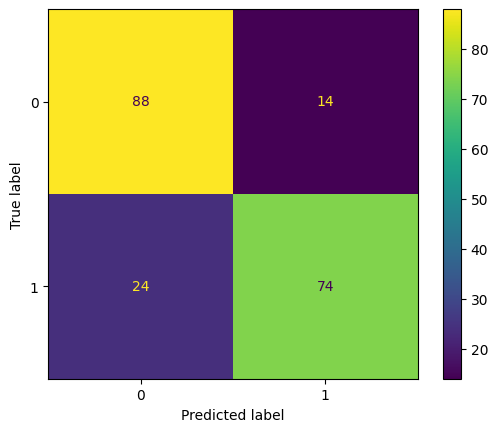

In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gbr_c=GradientBoostingClassifier()
gbr_c.fit(x_train,y_train)
pred=gbr_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=gbr_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbr_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.83
Recall Score 0.8469387755102041


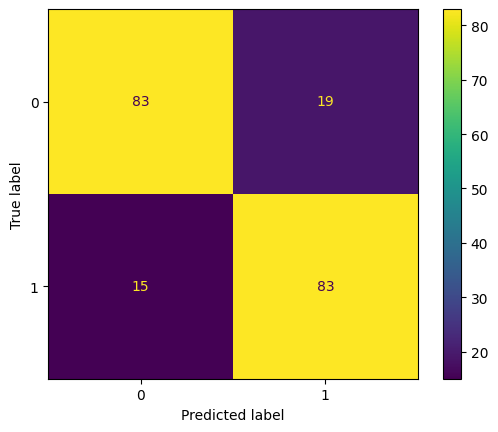

In [213]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=[('svc',svc),('lr',lr)],voting='soft',n_jobs=-1)
vt.fit(x_train,y_train)
pred=vt.predict(x_test)
pred_p=vt.predict_proba(x_test)[:,1]
print('Accuracy_score',accuracy_score(y_test,pred))
print("Recall Score",recall_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=vt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=vt.classes_)
disp.plot()
plt.show()

0.8979


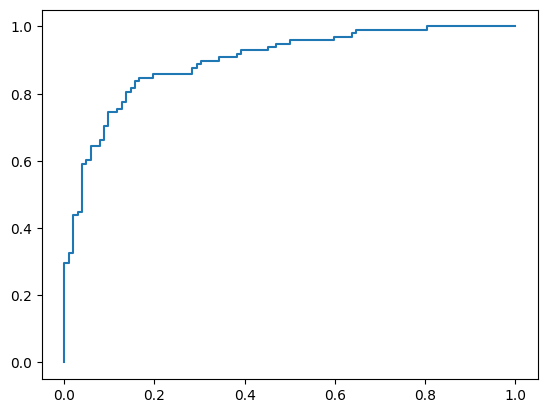

In [214]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thres=roc_curve(y_test,pred_p)
auc=round(roc_auc_score(y_test,pred_p),4)
print(auc)
plt.plot(fpr,tpr)

In [215]:
t=thres[np.argmax(tpr-fpr)]
pred=np.where(pred_p>t,1,0)
recall_score(y_test,pred)

0.8367346938775511

logistic regression has highest recall and accuracy

In [144]:
import pickle
pickle.dump(cv,open("vector.pkl",'wb'))
pickle.dump(lr,open("lr_model.pkl",'wb'))

Lets train our lr model on 1000 epoches and get mean of recall and accuracy. Here I have run all the cells from top till converting text into vector so that i get new samples

In [273]:
acc=[]
recall=[]
for _ in range(1000):
    # Sample 100 instances from the dataset
    new = df.sample(100)
    
    # Transform text data to numerical format
    x = cv.transform(new['text']).toarray()
    y = new['sentiment'].values
    
    # Predict using the logistic regression model
    pred = lr.predict(x)
    
    # Calculate and store accuracy and recall scores
    acc.append(accuracy_score(y, pred))
    recall.append(recall_score(y, pred))

# Calculate and print the mean accuracy and recall scores
mean_accuracy = np.mean(acc)
mean_recall = np.mean(recall)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall Score:", mean_recall)

Mean Accuracy: 0.9651200000000001
Mean Recall Score: 0.9730436607550672
